In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from matplotlib import rcParams,font_manager
from matplotlib.colors import ListedColormap
import pandas as pd

In [5]:
rcParams['figure.figsize'] = (6,6) #figure size in inches
rcParams['font.family'] = "sans-serif" 
rcParams['font.weight'] = "roman" 
rcParams['font.style'] = "normal" # not 100% sure what this does but it was recommended
rcParams['font.size'] = 32 # not 100% sure what this does but it was recommended
rcParams['pdf.fonttype'] = 42
rcParams['axes.linewidth'] = 2 #thickness of the border
rcParams['xtick.major.width'] = rcParams['axes.linewidth'] # make sure line widths are consistent
rcParams['ytick.major.width'] = rcParams['axes.linewidth']
rcParams['axes.spines.right'] = False #hides right border
rcParams['axes.spines.top'] = False #hides top
rcParams['legend.frameon'] = False #hides box around the legend
rcParams['legend.fontsize'] = 18 #font size in pt
rcParams['axes.labelsize'] = 32 
rcParams['xtick.labelsize'] = 24
rcParams['ytick.labelsize'] = rcParams['xtick.labelsize']
rcParams['lines.linewidth'] = 3
rcParams['xtick.major.size'] = 5
rcParams['lines.markersize'] = 16
rcParams['ytick.major.size'] = rcParams['xtick.major.size'] 

#ELO ratings
elo_ratings = {
 'R_3EEYoLyNN9SpuuT': 293,
 'R_1DSHShmupLFd4m9': 292,
 'R_zUdkqlxVsz3sXcJ': 258,
 'R_31SM3mwQvAhBwar': 247,
 'R_D1Afhly6eOCY66B': 242,
 'R_3fDgQlApbcv1n4e': 239,
 'R_0OFsszTuxG152et': 228,
 'R_NVGtaI93MLLVQfT': 216,
 'R_2ahKzS67s2u094R': 200,
 'R_vdABJ1XvXNriwff': 199,
 'R_2zuodaGDxpO8dfe': 172,
 'R_24rdiskqYQc7BsO': 163,
 'R_1LeQOpZ9pat1k7D': 161,
 'R_10BfVTQovUcZioM': 158,
 'R_2q8z9DfvMUHDZio': 149,
 'R_3j2tErwVrBPXWAH': 147,
 'R_Q0Jd5lCBrQu5Dm9': 147,
 'R_3lJsCIPqfpqRhkf': 146,
 'R_25zHKt5eqk2Fr1k': 139,
 'R_3kzZPXnjFGbpt30': 136,
 'R_2XpQzVOPaMJjkCo': 130,
 'R_1im5d5ENT1vk0Xm': 116,
 'R_3jciZNiYxaSffqd': 114,
 'R_2vjnTMhG0Bpa7wq': 108,
 'R_shhEOP9BPIFkz97': 93,
 'R_3oHOHstFKN4HiLA': 91,
 'R_1NCzjmN3Hl5r3HF': 80,
 'R_2OHMsGSLXJZG0Bc': 65,
 'R_z1hBUlYMwkfdbGh': 54,
 'R_r2BwOdT2hnmQ5WN': 49,
 'R_XEQd4AtPvWuAWnT': 32,
 'R_2X1ycnpBX7zJOwI': 20,
 'R_2zoxitKzRuYUblm': 14,
 'R_WBOZ0yrZfLTCClz': -21,
 'R_3ilNhJufw9u0JJr': -26,
 'R_1OGFPUUh0z8rWBh': -50,
 'R_2TTetTXWqRwQOGb': -70,
 'R_9Nac2hjg6u7BlS1': -88,
 'R_0voL9dLPRpILrS9': -158,
 'R_2xV1IwgJyplwuvp': -159,
 'R_bqny5leXGykyp0t': -161,
 'R_1F5MGuZ2rKZOLnc': -173,
 'R_2D6PtBpvztH0yVh': -185}

usernames = ['A112:R_1DSHShmupLFd4m9','A101:R_Q0Jd5lCBrQu5Dm9', 'A121:R_3j2tErwVrBPXWAH', 
             'A1083:R_0OFsszTuxG152et', 'A103:R_3lJsCIPqfpqRhkf', 'A130:R_zUdkqlxVsz3sXcJ',
            '101:R_31SM3mwQvAhBwar', '102:R_vdABJ1XvXNriwff', '107:R_2ahKzS67s2u094R',
            '117:R_2XpQzVOPaMJjkCo', '121:R_2zoxitKzRuYUblm', '129:R_2q8z9DfvMUHDZio',
            '139:R_1F5MGuZ2rKZOLnc', '152:R_XEQd4AtPvWuAWnT', '149:R_shhEOP9BPIFkz97', '150:R_3ilNhJufw9u0JJr',
            '156:R_2TTetTXWqRwQOGb', '166:R_9Nac2hjg6u7BlS1', '137:R_2X1ycnpBX7zJOwI',
            '256:R_10BfVTQovUcZioM', '175:R_2vjnTMhG0Bpa7wq', '181:R_3fDgQlApbcv1n4e',
            '187:R_3oHOHstFKN4HiLA', '192:R_1LeQOpZ9pat1k7D', '199:R_D1Afhly6eOCY66B',
             '201:R_3kzZPXnjFGbpt30', '202:R_2OHMsGSLXJZG0Bc', '200:R_1NCzjmN3Hl5r3HF',
             '194:R_24rdiskqYQc7BsO', '196:R_0voL9dLPRpILrS9', '197:R_bqny5leXGykyp0t',
             '179:R_2xV1IwgJyplwuvp', '180:R_1OGFPUUh0z8rWBh', '250:R_r2BwOdT2hnmQ5WN',
             '273:R_2zuodaGDxpO8dfe', '281:R_NVGtaI93MLLVQfT', '290:R_25zHKt5eqk2Fr1k',
             '305:R_WBOZ0yrZfLTCClz', '842:R_3jciZNiYxaSffqd',
             '846:R_z1hBUlYMwkfdbGh', '844:R_2D6PtBpvztH0yVh', '849:R_1im5d5ENT1vk0Xm',
             '856:R_3EEYoLyNN9SpuuT', '149:R_shhEOP9BPIFkz97', '150:R_3ilNhJufw9u0JJr',
             '156:R_2TTetTXWqRwQOGb', '166:R_9Nac2hjg6u7BlS1', '137:R_2X1ycnpBX7zJOwI',
             
            '859:R_2TIcY7St40mDSbp', '832:R_xlnbFfl5i6Zgz5v',
            '858:R_3NR4vGxEweQ74vU', '833:R_1IsH6cT55Ys9Qu4', '834:R_30ppJhWfEZIOoSi', '182:R_3NEgCFlK1BFSmdZ',
            '183:R_2uPQbPniskmS0Ep', '208:R_2AST2XkjQUqflkc', '212:R_OOl4OrOpRgbrLBD', '215:R_32R47f1GRrLhRdX',
            '228:R_ULyuWg2JwZBuGiJ', '245:R_eINRkRhqhKHRjzz', '231:R_2QRpawEy8w6txvN', '226:R_2X10rcLujzFpHxv', 
            '236:R_24qFUPTZKx0SybQ', '249:R_d1i4xMt2Vzivxg5', '216:R_21j62EoiJ63yEJ5', '217:R_1JPc2llYzw1ezqs',
            '227:R_2qlLx30lmNEXUJL', '230:R_28G5rUmynDONqbJ', '209:R_1esokoelkIOTy89', '242:R_12lQaNUgCpqQizh',
            '248:R_1Do3QQWN7pWkPwQ', '171:R_1Qck2ykGDls2DLz', '221:R_2wvlbfkxX6e4M29', '229:R_3KxYOzYEKloODvs']

psiturkid2username = {username.split(":")[1]: username for username in usernames}
studyid2username = {username.split(":")[0]: username for username in usernames}
username2studyid = {username: username.split(":")[0] for username in usernames}
username2psiturkid = {username: username.split(":")[1] for username in usernames}

In [214]:
datadir = "./"
age = pd.read_csv(datadir + "demog_12_9.csv")
pwm = pd.read_csv(datadir + "params_with_metrics.csv").rename(columns = {"0": "subject_nr", "1": "split"})
dur = pd.read_csv(datadir + "gameDurations.csv")
rts = pd.read_csv("../../Experiment code/reactiontimes.csv")

bins = [7, 12, 18, 26]
age = pd.read_csv("/Users/ilima/Google Drive/Projects/Cate Hartley Weiji/4inarow_fitting_data/demog_12_9.csv")
age["username"] = age["StudyID"].apply(lambda id: studyid2username.get(id, "-"))
pwm = pd.read_csv("/Users/ilima/Google Drive/Projects/Cate Hartley Weiji/4inarow_fitting_data/params_with_metrics.csv").rename(columns = {"0": "subject_nr", "1": "split"})
age["username"] = age["StudyID"].apply(lambda id: studyid2username.get(id, "-"))
age['ageBin'] = pd.cut(age['FlooredAge'], bins)
age['ageBinNr'] = age['ageBin'].cat.codes
dur["MainDurationMinutes"] = dur["MainDurationSeconds"] / 60
dur["TotalDurationMinutes"] = dur["TotalDurationSeconds"] / 60
rts["TotalMoves"] = rts["UserMoves"] + rts["OpponentMoves"]
metrics = pwm.loc[:,("subject_nr", "split", "planning depth", "feature drop rate", "heuristic quality")]
metrics.loc[:,"username"] = metrics["subject_nr"].apply(lambda nr: usernames[nr - 1])
metrics = pd.merge(metrics, age, on="username", how="left")
metrics["elo"] = metrics["username"].apply(lambda name: elo_ratings[username2psiturkid[name]])
metrics

,subject_nr,split,planning depth,feature drop rate,heuristic quality,username,StudyID,DoB,Gender,ExactAge,FlooredAge,TaskDate,ageBin,ageBinNr,elo
0,1,1,8.13583,0.436090,0.638619,A112:R_1DSHShmupLFd4m9,A112,2/24/01,F,19.6904,19,10/29/20,"(18, 26]",2,292
1,1,2,2.92211,0.273650,0.559960,A112:R_1DSHShmupLFd4m9,A112,2/24/01,F,19.6904,19,10/29/20,"(18, 26]",2,292
2,1,3,0.04544,0.055475,0.596631,A112:R_1DSHShmupLFd4m9,A112,2/24/01,F,19.6904,19,10/29/20,"(18, 26]",2,292
3,1,4,9.13304,0.162850,0.525318,A112:R_1DSHShmupLFd4m9,A112,2/24/01,F,19.6904,19,10/29/20,"(18, 26]",2,292
4,1,5,0.00000,0.312920,0.616708,A112:R_1DSHShmupLFd4m9,A112,2/24/01,F,19.6904,19,10/29/20,"(18, 26]",2,292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,48,1,2.21188,0.485960,0.591622,137:R_2X1ycnpBX7zJOwI,137,10/23/09,F,11.0849,11,11/20/20,"(7, 12]",0,20
236,48,2,8.15202,0.341490,0.706751,137:R_2X1ycnpBX7zJOwI,137,10/23/09,F,11.0849,11,11/20/20,"(7, 12]",0,20
237,48,3,3.46447,0.647700,0.658019,137:R_2X1ycnpBX7zJOwI,137,10/23/09,F,11.0849,11,11/20/20,"(7, 12]",0,20
238,48,4,3.06731,0.315760,0.656761,137:R_2X1ycnpBX7zJOwI,137,10/23/09,F,11.0849,11,11/20/20,"(7, 12]",0,20


In [355]:
age_colors = ['#7DE3AC', '#129951','#20382B']
age_labels = ["8 to 12","13 to 17","18 to 24"]

def set_labels(ax, title):
    ax.set_xlabel("Age")
    ax.set_ylabel(title)
    labels = age_labels.copy()
    if len(ax.xaxis.get_major_locator()()) == 5:
        labels.insert(0, "")
        labels.append("")
    ax.set_xticklabels(labels)
    ax.legend([])
    return ax

def plot_with_errorbars(col, title):
    ax = metrics.groupby("ageBin")[col].aggregate(['mean', 'sem']).plot(yerr="sem", color='k')
    size = 300
    metrics.groupby("ageBinNr")[col].aggregate(['mean']).reset_index().plot.scatter('ageBinNr', 'mean', size, age_colors, ax=ax)
#     circles = metrics.loc[:,("subject_nr","ageBinNr",col)].drop_duplicates()
#     circles.plot.scatter("ageBinNr", col, ax=ax)
    ax.set_xlabel("Age")
    ax.set_ylabel(title)
    ax.set_xticklabels(["","8 to 12","13 to 17","18 to 24",""])
    ax.legend([])    set_labels(ax, title)

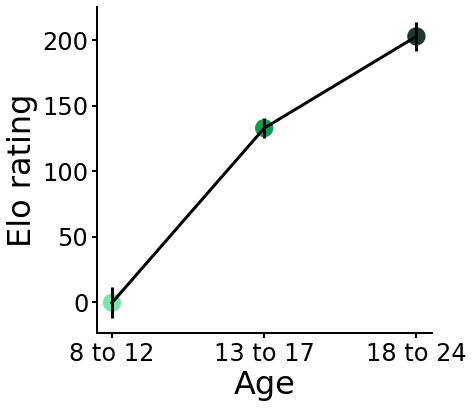

In [356]:
plot_with_errorbars("elo", "Elo rating")

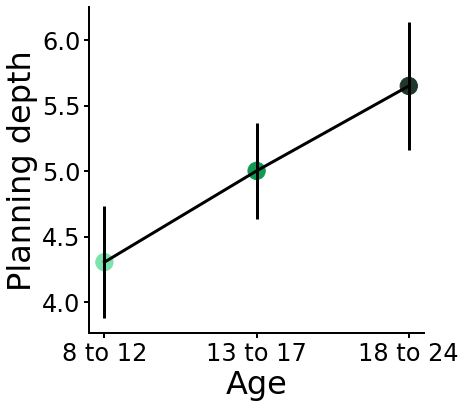

In [203]:
plot_with_errorbars("planning depth", "Planning depth")

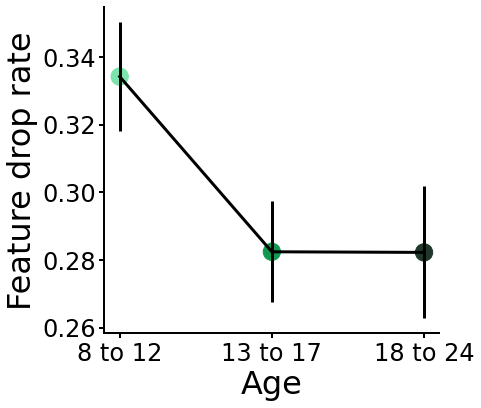

In [204]:
plot_with_errorbars("feature drop rate", "Feature drop rate")

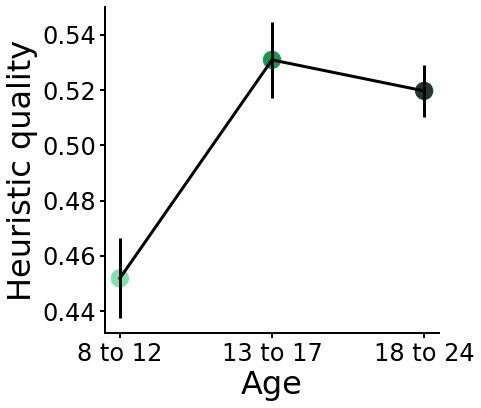

In [205]:
plot_with_errorbars("heuristic quality", "Heuristic quality")

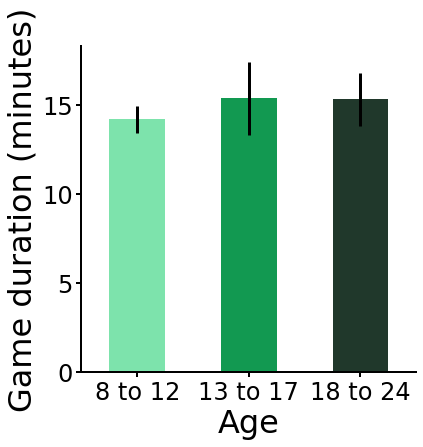

In [206]:
plotdata = pd.merge(dur, age, how="left", left_on="User", right_on="username").groupby("ageBin")["MainDurationMinutes"].aggregate(['mean', 'sem'])
ax = plotdata.plot(kind="bar", yerr="sem", color=[age_colors])
set_labels(ax, "Game duration (minutes)").tick_params("x", labelrotation=0)

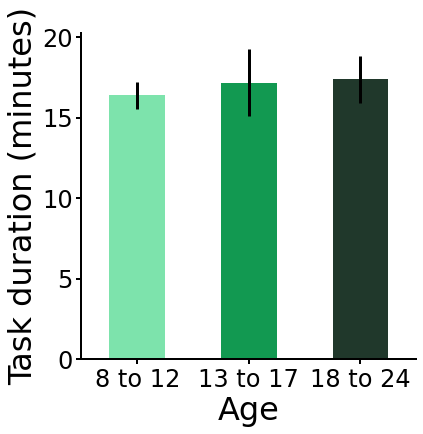

In [207]:
plotdata = pd.merge(dur, age, how="left", left_on="User", right_on="username").groupby("ageBin")["TotalDurationMinutes"].aggregate(['mean', 'sem'])
ax = plotdata.plot(kind="bar", yerr="sem", color=[age_colors])
set_labels(ax, "Task duration (minutes)").tick_params("x", labelrotation=0)

In [368]:
plotdata = pd.merge(rts, age, left_on="User", right_on="username", how="left")[["User", "GameNr", "TotalMoves", "ageBinNr"]].drop_duplicates()
plotdata["count"] = 1
plotdata = plotdata.groupby(["ageBinNr", "TotalMoves"])["count"].sum().reset_index().pivot(index="TotalMoves",columns="ageBinNr").fillna(0)
plotdata.loc[6] = 0
plotdata.loc[37] = 0
plotdata = plotdata.sort_index()

subsPerBin = metrics[["subject_nr", "ageBinNr"]].drop_duplicates().groupby("ageBinNr").count()
for binNr in range(len(bins) - 1):
    plotdata.iloc[:,binNr] = plotdata.iloc[:,binNr] / subsPerBin.iloc[binNr,0]

plotdata

count                    
ageBinNr           0         1         2
TotalMoves                              
6           0.000000  0.000000  0.000000
7           5.260870  6.210526  7.333333
8           3.260870  3.842105  3.000000
9           1.869565  3.421053  2.833333
10          1.652174  2.157895  2.500000
11          2.000000  2.684211  3.333333
12          1.304348  2.578947  2.666667
13          1.304348  2.421053  2.166667
14          1.782609  1.631579  2.166667
15          1.521739  1.842105  0.833333
16          0.869565  1.157895  1.000000
17          0.956522  1.684211  1.333333
18          0.739130  0.578947  1.166667
19          0.695652  0.789474  0.500000
20          0.391304  0.578947  0.666667
21          0.391304  0.578947  1.000000
22          0.521739  0.315789  0.666667
23          0.260870  0.368421  0.166667
24          0.173913  0.315789  0.166667
25          0.478261  0.157895  0.666667
26          0.260870  0.263158  0.000000
27          0.217391  0.105263  0.166667
28          0.043478  0.000000  0.166667
29          0.217391  0.157895  0.166667
30          0.130435  0.000000  0.000000
32          0.043478  0.052632  0.000000
33          0.043478  0.000000  0.000000
34          0.043478  0.000000  0.000000
35          0.043478  0.000000  0.000000
36          0.913043  1.000000  0.333333
37          0.000000  0.000000  0.000000

Text(0, 0.5, 'Average frequency')

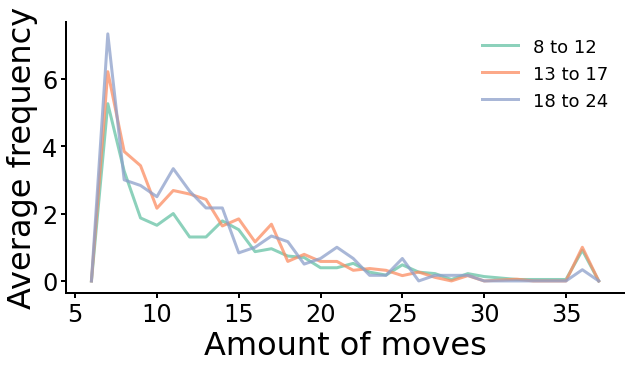

In [369]:
ax = plotdata.plot(color=["#66C2A5C0", "#FC8D62C0", "#8DA0CBC0"], figsize=(10, 5))
ax.legend(age_labels)
ax.set_xlabel("Amount of moves")
ax.set_ylabel("Average frequency")